Intercept: [38423.30585816], slope: [-821.73337832]


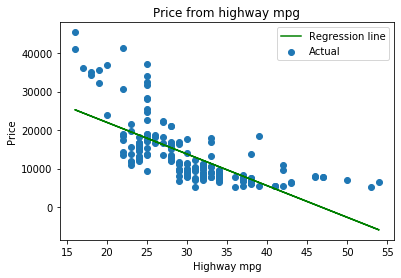

In [17]:
# Learn different regressions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
import sklearn.linear_model as lm

# Read the clean model
df = pd.read_csv("data" + os.path.sep + "autos_85_clean.csv")

# Instantiate the linear model
lm = lm.LinearRegression()

X = df[["highway-mpg"]]
Y = df[["price"]]

# Fit the model
lm.fit(X, Y)

# Predict the values
Yhat = lm.predict(X)

# Plot the results
plt.scatter(X, Y)
plt.plot(X, Yhat, color='green')
plt.xlabel("Highway mpg")
plt.ylabel("Price")
plt.title("Price from highway mpg")
plt.legend(['Regression line', 'Actual'])

# Print the intercept and the slope
print("Intercept: " + str(lm.intercept_) + ", slope: " + str(lm.coef_[0]))

In [25]:
# Train with several predictors
columns = list(df)
print("Columns: " + str(columns))

# Choose the predictors
X = df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]]

# Train the model
lm.fit(X, Y)

# Predict the values
Yhat = lm.predict(X)

# Print the intercept and the slope
print("\nIntercept: " + str(lm.intercept_) + ", slope: " + str(lm.coef_))

Columns: ['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-lpg', 'highway-mpg', 'price', 'price-binned', 'horsepower-binned', 'diesel', 'gas']

Intercept: [-15831.9309603], slope: [[53.66247317 81.44600167  4.70938694 36.55016267]]


(0, 47754.81011510327)

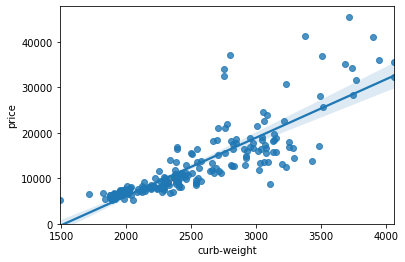

In [27]:
# Use the seaborn for a regression plot
sns.regplot(x  = "curb-weight", y = "price", data = df)
plt.ylim(0,)

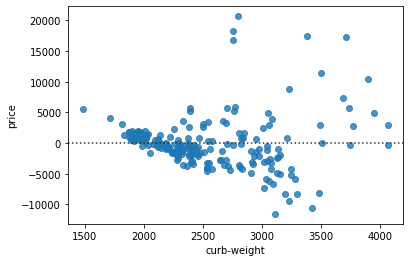

In [28]:
# Plot the residuals with seaborn: curb-weight
sns.residplot(x  = "curb-weight", y = "price", data = df)

# The higher values of "curb-weight" the error grows so the linear assumption is not good

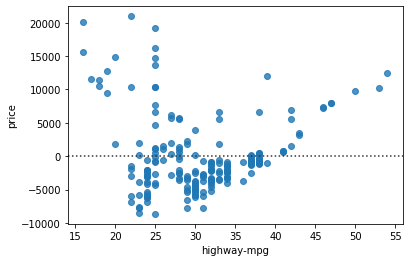

In [29]:
# Plot the residuals with seaborn: highway-mpg
sns.residplot(x  = "highway-mpg", y = "price", data = df)

# The residuals again show a curvature so the linear assumption is not good


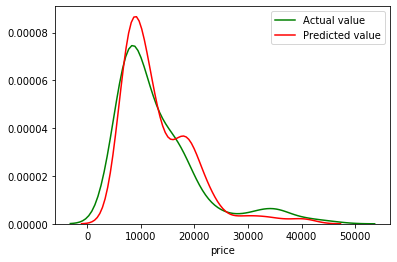

In [47]:
# Comparing the distribution plots of the actual and predicted values also allows to assess the quality of the model

def plot_distributions(Y, Yhat):
    ax1 = sns.distplot(Y, hist = False, color = "green", label = "Actual value")
    sns.distplot(Yhat, hist = False, color = "red", label = "Predicted value", ax = ax1)
    
plot_distributions(Y, Yhat)

Coefficients: 

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
Model: 

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


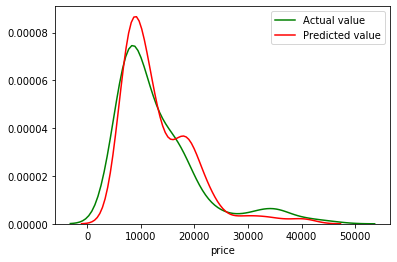

In [46]:
# Perform third order Polynomial Regression with NumPy
X = df["highway-mpg"]
Y = df["price"]
# First fit the model to get the coefficient
fit = np.polyfit(X, Y, 3)

print("Coefficients: \n")
print(fit)

print("Model: \n")
pol = np.poly1d(fit)
print(pol)

# Evaluate the model
Yhat = pol(X)

plot_distributions(Y, Yhat)

In [50]:
# NumPy can not handle multi-dimensional polynomial regression
# Therefore we use the sklearn for that, here we can transform 
# features into polynomial features
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2, include_bias = False)

x_polly = pr.fit_transform(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

# Now we should be use the transformed ones for polynomial regression with NumPy

[[1.1100000e+02 1.3000000e+02 2.5480000e+03 ... 6.4923040e+06
  6.8796000e+04 7.2900000e+02]
 [1.1100000e+02 1.3000000e+02 2.5480000e+03 ... 6.4923040e+06
  6.8796000e+04 7.2900000e+02]
 [1.5400000e+02 1.5200000e+02 2.8230000e+03 ... 7.9693290e+06
  7.3398000e+04 6.7600000e+02]
 ...
 [1.3400000e+02 1.7300000e+02 3.0120000e+03 ... 9.0721440e+06
  6.9276000e+04 5.2900000e+02]
 [1.0600000e+02 1.4500000e+02 3.2170000e+03 ... 1.0349089e+07
  8.6859000e+04 7.2900000e+02]
 [1.1400000e+02 1.4100000e+02 3.0620000e+03 ... 9.3758440e+06
  7.6550000e+04 6.2500000e+02]]


In [51]:
# For standartization we can use the StandardScaler to scale all features simultaneously
from sklearn.preprocessing import StandardScaler

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

# Transform the data into scaled one
x_scaled = scaler.transform(df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]])

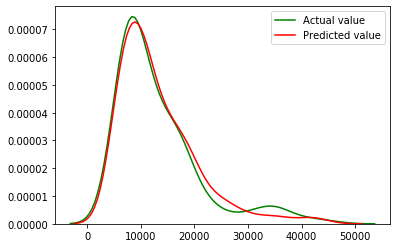

In [61]:
# Pipeline libraries, the steps typically look as follows: Normalizaion > Polynomial Transform > Regression
# Pipelines allow to perform series of transformation getting the predictions in the end
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create the list of tuples with the names mapped to instances of pipeline elements
descriptor = [('scale', StandardScaler()), \
              ('polynomial', PolynomialFeatures(degree = 2)), \
              ('model', LinearRegression())]

# Create the pipeline from the object
pipe = Pipeline(descriptor)

# Train the pipeling on the data
X = df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]]
Y = df[["price"]]
pipe.fit(X, Y)

# Predict the data
Yhat = pipe.predict(X)

# Plot the distributions
plot_distributions(Y, Yhat)